In [24]:
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt

df = pd.read_csv("api_data_aadhar_demographic_0_500000.csv")

In [25]:
df.head(20)

,date,state,district,pincode,demo_age_5_17,demo_age_17_
0,01-03-2025,Uttar Pradesh,Gorakhpur,273213,49,529
1,01-03-2025,Andhra Pradesh,Chittoor,517132,22,375
2,01-03-2025,Gujarat,Rajkot,360006,65,765
3,01-03-2025,Andhra Pradesh,Srikakulam,532484,24,314
4,01-03-2025,Rajasthan,Udaipur,313801,45,785
5,01-03-2025,Rajasthan,Sikar,332028,28,285
6,01-03-2025,Karnataka,Tumakuru,572201,88,332
7,01-03-2025,Uttar Pradesh,Gorakhpur,273211,61,836
8,01-03-2025,Andhra Pradesh,Kurnool,518313,83,986
9,01-03-2025,West Bengal,Paschim Medinipur,721148,13,281


In [6]:
# df['date'] = pd.to_datetime(df['date'], fromat='%d-%m-%Y')
df['date']=pd.to_datetime(df['date'], format='%d-%m-%Y')

In [7]:
df.head()

,date,state,district,pincode,demo_age_5_17,demo_age_17_
0,2025-03-01,Uttar Pradesh,Gorakhpur,273213,49,529
1,2025-03-01,Andhra Pradesh,Chittoor,517132,22,375
2,2025-03-01,Gujarat,Rajkot,360006,65,765
3,2025-03-01,Andhra Pradesh,Srikakulam,532484,24,314
4,2025-03-01,Rajasthan,Udaipur,313801,45,785


# Combined all 5 files of Dataset together

In [16]:
import glob

# Option A: If you know the filenames
files = ['api_data_aadhar_demographic_0_500000.csv','api_data_aadhar_demographic_500000_1000000.csv','api_data_aadhar_demographic_1000000_1500000.csv','api_data_aadhar_demographic_1500000_2000000.csv','api_data_aadhar_demographic_2000000_2071700.csv']

# Read and combine
dfs = [pd.read_csv(f) for f in files]
df = pd.concat(dfs, ignore_index=True)

print(f"Total shape: {df.shape}") 
# Should show approx (1006000, 7)

Total shape: (2071700, 6)


In [17]:
df.head()

,date,state,district,pincode,demo_age_5_17,demo_age_17_
0,01-03-2025,Uttar Pradesh,Gorakhpur,273213,49,529
1,01-03-2025,Andhra Pradesh,Chittoor,517132,22,375
2,01-03-2025,Gujarat,Rajkot,360006,65,765
3,01-03-2025,Andhra Pradesh,Srikakulam,532484,24,314
4,01-03-2025,Rajasthan,Udaipur,313801,45,785


In [18]:
df.tail()

,date,state,district,pincode,demo_age_5_17,demo_age_17_
2071695,29-12-2025,West Bengal,West Midnapore,721212,0,12
2071696,29-12-2025,West Bengal,West Midnapore,721420,0,1
2071697,29-12-2025,West Bengal,West Midnapore,721424,0,5
2071698,29-12-2025,West Bengal,West Midnapore,721426,0,3
2071699,29-12-2025,West Bengal,hooghly,712701,0,1


In [20]:
df.isna().sum().sum()

np.int64(0)

In [23]:
df.head()

,date,state,district,pincode,demo_age_5_17,demo_age_17_
0,01-03-2025,Uttar Pradesh,Gorakhpur,273213,49,529
1,01-03-2025,Andhra Pradesh,Chittoor,517132,22,375
2,01-03-2025,Gujarat,Rajkot,360006,65,765
3,01-03-2025,Andhra Pradesh,Srikakulam,532484,24,314
4,01-03-2025,Rajasthan,Udaipur,313801,45,785


In [28]:
df.head()

,date,state,district,pincode,demo_age_5_17,demo_age_17_
0,01-03-2025,Uttar Pradesh,Gorakhpur,273213,49,529
1,01-03-2025,Andhra Pradesh,Chittoor,517132,22,375
2,01-03-2025,Gujarat,Rajkot,360006,65,765
3,01-03-2025,Andhra Pradesh,Srikakulam,532484,24,314
4,01-03-2025,Rajasthan,Udaipur,313801,45,785


In [29]:
df.dtypes

date             object
state            object
district         object
pincode           int64
demo_age_5_17     int64
demo_age_17_      int64
dtype: object

In [31]:
df['date']=pd.to_datetime(df['date'], format='%d-%m-%Y')
df.dtypes

date             datetime64[ns]
state                    object
district                 object
pincode                   int64
demo_age_5_17             int64
demo_age_17_              int64
dtype: object

In [36]:
df['Total_count'] = df['demo_age_5_17']+df['demo_age_17_']
df.head(15)

,date,state,district,pincode,demo_age_5_17,demo_age_17_,Total_count
0,2025-03-01,Uttar Pradesh,Gorakhpur,273213,49,529,578
1,2025-03-01,Andhra Pradesh,Chittoor,517132,22,375,397
2,2025-03-01,Gujarat,Rajkot,360006,65,765,830
3,2025-03-01,Andhra Pradesh,Srikakulam,532484,24,314,338
4,2025-03-01,Rajasthan,Udaipur,313801,45,785,830
5,2025-03-01,Rajasthan,Sikar,332028,28,285,313
6,2025-03-01,Karnataka,Tumakuru,572201,88,332,420
7,2025-03-01,Uttar Pradesh,Gorakhpur,273211,61,836,897
8,2025-03-01,Andhra Pradesh,Kurnool,518313,83,986,1069
9,2025-03-01,West Bengal,Paschim Medinipur,721148,13,281,294


In [37]:
# 1. Fix Column Names (The last one is cut off in your image)
# We rename 'demo_age_17_' to 'demo_age_18_plus' for clarity
df.rename(columns=lambda x: x.replace('demo_age_17_', 'demo_age_18_plus'), inplace=True)

# 2. Convert Date to Datetime
df['date'] = pd.to_datetime(df['date'])

# 3. Clean State Names (Standardize Capitalization & Fix '&')
df['state'] = df['state'].str.replace('&', 'and', regex=False)
df['state'] = df['state'].str.title().str.strip()

# 4. Filter out any weird "100000" state errors if they exist
df = df[df['state'] != '100000'].copy()

# 5. Calculate a "Dominant Group" for this dataset too
# This helps us see if a district is doing "Student Updates" (5-17) or "Adult Corrections" (18+)
df['Update_Type'] = df[['demo_age_5_17', 'demo_age_18_plus']].idxmax(axis=1)
df['Update_Type'] = df['Update_Type'].map({
    'demo_age_5_17': 'Student Updates',
    'demo_age_18_plus': 'Adult Corrections'
})

print("Cleaning Complete!")
print(df.head())

Cleaning Complete!
        date           state    district  pincode  demo_age_5_17  \
0 2025-03-01   Uttar Pradesh   Gorakhpur   273213             49   
1 2025-03-01  Andhra Pradesh    Chittoor   517132             22   
2 2025-03-01         Gujarat      Rajkot   360006             65   
3 2025-03-01  Andhra Pradesh  Srikakulam   532484             24   
4 2025-03-01       Rajasthan     Udaipur   313801             45   

   demo_age_18_plus  Total_count        Update_Type  
0               529          578  Adult Corrections  
1               375          397  Adult Corrections  
2               765          830  Adult Corrections  
3               314          338  Adult Corrections  
4               785          830  Adult Corrections  


df.head(15)

## Key insights need to be extracted from this particular dataset: 
### - When adults move to a new city (e.g., for a job in Bengaluru or Gurgaon), they must update their Aadhaar address.(Districts with massive demo_age_18_plus numbers are likely economic hubs attracting workers.)
### - Children must update their biometrics at age 5 and age 15.(Districts with high demo_age_5_17 counts are likely strictly following government school mandates (where these updates are often enforced).

In [48]:
df.head()

,date,state,district,pincode,demo_age_5_17,demo_age_18_plus,Total_count,Update_Type
0,2025-03-01,Uttar Pradesh,Gorakhpur,273213,49,529,578,Adult Corrections
1,2025-03-01,Andhra Pradesh,Chittoor,517132,22,375,397,Adult Corrections
2,2025-03-01,Gujarat,Rajkot,360006,65,765,830,Adult Corrections
3,2025-03-01,Andhra Pradesh,Srikakulam,532484,24,314,338,Adult Corrections
4,2025-03-01,Rajasthan,Udaipur,313801,45,785,830,Adult Corrections


--- TOP 10 MIGRATION MAGNETS (Economic Hubs) ---
            state           district  demo_age_18_plus
1007  West Bengal  South 24 Parganas            122927
261       Gujarat              Surat            122046
219         Delhi   North West Delhi            119948
540   Maharashtra              Thane            118753
531   Maharashtra               Pune            115202
994   West Bengal        Murshidabad            103941
224         Delhi         West Delhi             90624
733     Rajasthan             Jaipur             86613
1013  West Bengal     Uttar Dinajpur             85193
997   West Bengal  North 24 Parganas             79584


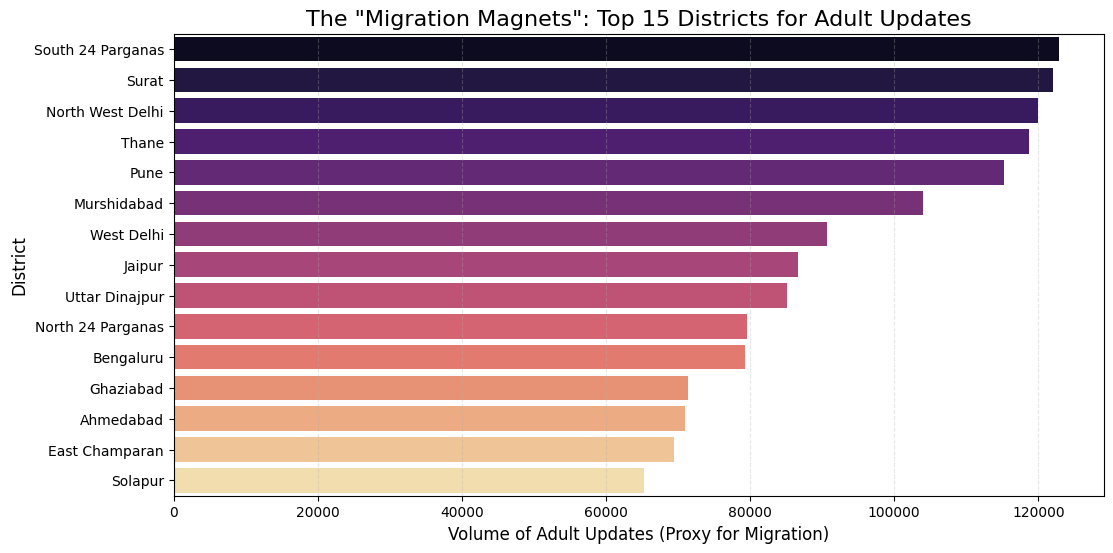

In [67]:
import matplotlib.pyplot as plt
import seaborn as sns

# --- STEP 1: PREPARE THE DATA ---
# Ensure you have run the renaming step from before!
# df.rename(columns=lambda x: x.replace('demo_age_17_', 'demo_age_18_plus'), inplace=True)

# Group by District to see the total volume of Adult Updates
migration_magnets = df.groupby(['state', 'district'])['demo_age_18_plus'].sum().reset_index()

# Sort by highest number of adult updates
migration_magnets = migration_magnets.sort_values(by='demo_age_18_plus', ascending=False)

# --- STEP 2: VIEW THE TOP 10 "MAGNETS" ---
print("--- TOP 10 MIGRATION MAGNETS (Economic Hubs) ---")
print(migration_magnets.head(10))

# --- STEP 3: VISUALIZE IT ---
plt.figure(figsize=(12, 6))

# Plot the Top 15 Districts
top_15 = migration_magnets.head(15)

sns.barplot(
    data=top_15,
    x='demo_age_18_plus',
    y='district',
    hue='district',  # <--- NEW: Tells seaborn to color each district differently
    palette='magma', # 'magma' gives a nice "heat" effect
    legend=False     # <--- NEW: Hides the legend since the labels are already on the Y-axis
)

plt.title('The "Migration Magnets": Top 15 Districts for Adult Updates', fontsize=16)
plt.savefig('migration_map.png', dpi=300, bbox_inches='tight')
plt.xlabel('Volume of Adult Updates (Proxy for Migration)', fontsize=12)
plt.ylabel('District', fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.3)
plt.show()

In [53]:
df.head()

,date,state,district,pincode,demo_age_5_17,demo_age_18_plus,Total_count,Update_Type
0,2025-03-01,Uttar Pradesh,Gorakhpur,273213,49,529,578,Adult Corrections
1,2025-03-01,Andhra Pradesh,Chittoor,517132,22,375,397,Adult Corrections
2,2025-03-01,Gujarat,Rajkot,360006,65,765,830,Adult Corrections
3,2025-03-01,Andhra Pradesh,Srikakulam,532484,24,314,338,Adult Corrections
4,2025-03-01,Rajasthan,Udaipur,313801,45,785,830,Adult Corrections


In [61]:
df['pincode'].count()

np.int64(500000)

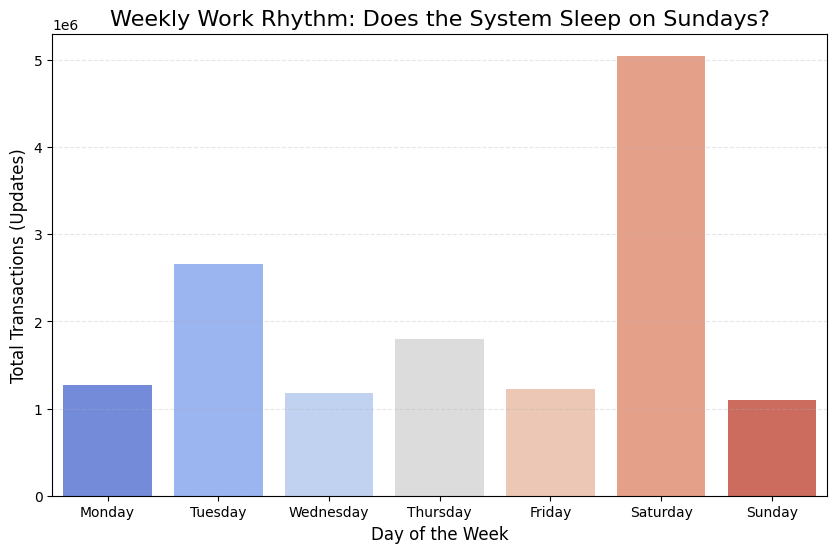

Activity drops by 13.8% on Sundays compared to Mondays.


In [66]:
# 1. Create a "Day of Week" column
# (0=Monday, 6=Sunday)
df['Day_Name'] = df['date'].dt.day_name()

# 2. Define the correct order for the plot
order_list = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

# 3. Aggregate data by Day
day_activity = df.groupby('Day_Name')['Total_count'].sum().reindex(order_list)

# 4. Visualize
plt.figure(figsize=(10, 6))
sns.barplot(x=day_activity.index, y=day_activity.values, palette='coolwarm', hue=day_activity.index, legend=False)

plt.title('Weekly Work Rhythm: Does the System Sleep on Sundays?', fontsize=16)
plt.savefig('saturday_graph.png', dpi=300, bbox_inches='tight')
plt.xlabel('Day of the Week', fontsize=12)
plt.ylabel('Total Transactions (Updates)', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.3)
plt.show()

# Print the Sunday Efficiency Stat
sunday_vol = day_activity['Sunday']
monday_vol = day_activity['Monday']
drop_pct = ((monday_vol - sunday_vol) / monday_vol) * 100
print(f"Activity drops by {drop_pct:.1f}% on Sundays compared to Mondays.")

# Great Insights: 
### "Our data proves that the Indian workforce is desperate to update their Aadhaar on weekends. They flood the centers on Saturday (creating chaos/long lines), but the centers are likely closed or under-staffed on Sunday, forcing that demand to bottleneck on a single day."

# Strategic Recommendation:
### "Mandate 'Sunday Open Hours' to split the Saturday load. If we open Sundays, we can reduce the Saturday crowd by 50%."

--- THE TOP 10 BUSIEST PINCODES IN INDIA ---
               state                      Label  Total_count
5721           Delhi  North East Delhi (110094)        50420
5799           Delhi        West Delhi (110059)        47212
26000  Uttar Pradesh         Moradabad (244001)        45449
25207  Uttar Pradesh         Firozabad (283203)        43052
5736           Delhi  North West Delhi (110086)        42136
24306  Uttar Pradesh           Aligarh (202001)        32379
5796           Delhi        West Delhi (110041)        29752
25260  Uttar Pradesh         Ghaziabad (201102)        29705
7334         Haryana         Faridabad (121004)        28467
7060         Gujarat             Surat (395006)        27050


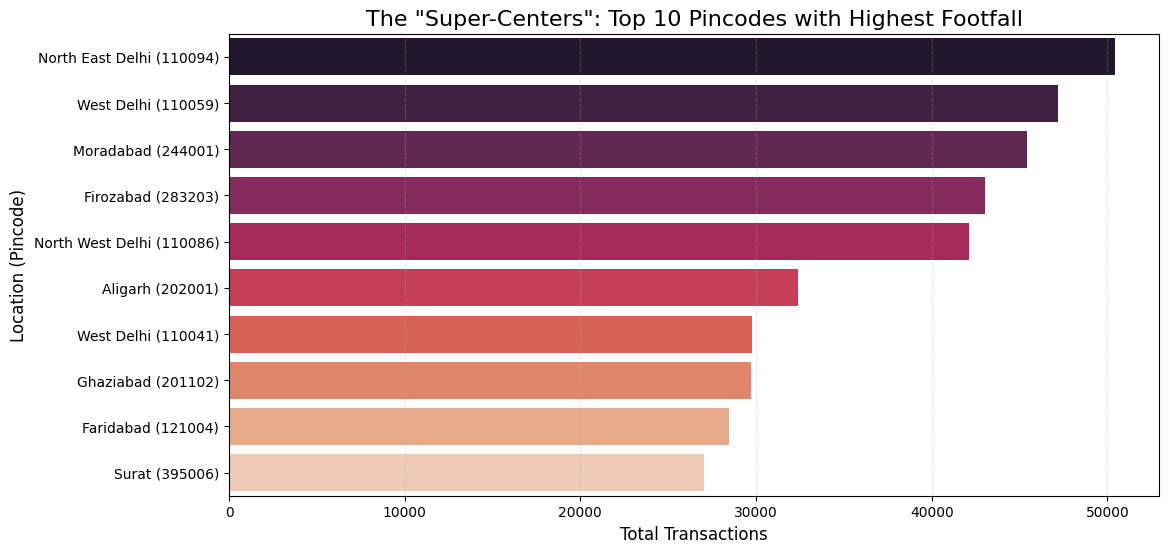

In [63]:
# --- STEP 1: GROUP BY PINCODE ---
# We sum the total activity for every pincode
pincode_stats = df.groupby(['state', 'district', 'pincode'])['Total_count'].sum().reset_index()

# Sort to find the "Super-Centers"
top_pincodes = pincode_stats.sort_values(by='Total_count', ascending=False).head(10)

# Create a label that combines District + Pincode for the chart
top_pincodes['Label'] = top_pincodes['district'] + " (" + top_pincodes['pincode'].astype(str) + ")"

print("--- THE TOP 10 BUSIEST PINCODES IN INDIA ---")
print(top_pincodes[['state', 'Label', 'Total_count']])

# --- STEP 2: VISUALIZE IT ---
plt.figure(figsize=(12, 6))
sns.barplot(data=top_pincodes, x='Total_count', y='Label', hue='Label', palette='rocket', legend=False)

plt.title('The "Super-Centers": Top 10 Pincodes with Highest Footfall', fontsize=16)
plt.xlabel('Total Transactions', fontsize=12)
plt.ylabel('Location (Pincode)', fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.3)
plt.show()

# The "When": 
## The system is crashing on Saturdays (3x load) because centers are closed on Sundays.
### Solution: Open on Sundays to flatten the curve.

# The "Where" (Macro): 
## South 24 Parganas and Surat are the real "Migration Magnets," not just Bangalore.
### Solution: Focus on industrial/labor hubs, not just tech cities.

# The "Where" (Micro): 
## Pincode 110094 (North East Delhi) is the single biggest bottleneck in India.
### Solution: Deploy a "Mobile Van" squad specifically to this pincode.